In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('../input/p92-data-test/CE802_P2_Data.csv')
df1 = df.dropna()

means = df['F15'].mean()
df_means = df.where(pd.notnull(df['F15']), means)
df_means['Class'] = (df_means['Class'] == True).astype(int)
print(df1)

       F1     F2    F3     F4      F5    F6     F7    F8     F9  F10     F11  \
0      16   6.03 -4.56  30.00   63.04  0.55  -0.78  0.96  -1.67    1 -339.75   
2     630  43.35  0.50  50.70  219.04 -3.46  10.08  5.65 -14.67   10 -129.75   
3      30   2.79 -3.58  31.83   69.04 -0.40  -0.09  0.18  -1.67    1 -276.75   
6     122   5.04 -8.80  32.07   88.04  1.33   0.12  0.48  -3.67    1 -270.75   
8     260  21.75  5.78  53.70  259.04 -4.31  16.50  7.40 -14.67   10 -309.75   
...   ...    ...   ...    ...     ...   ...    ...   ...    ...  ...     ...   
1488   32   2.10 -4.02  32.70   87.04  2.24   2.16  0.31  -1.67    1 -273.75   
1489   22   3.27 -7.94  30.66   76.04 -0.15  -0.93  0.90  -2.67    1 -294.75   
1492  200  20.40  2.98  46.50  254.04 -3.74   8.70  7.30 -14.67   10 -369.75   
1496    2   4.29 -5.10  30.54   86.04  1.84  -1.77  0.73  -1.67    1 -279.75   
1499   20   5.31 -3.02  31.44   72.04  0.74   2.16  1.02   0.33    1 -297.75   

       F12    F13   F14    F15  Class  

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

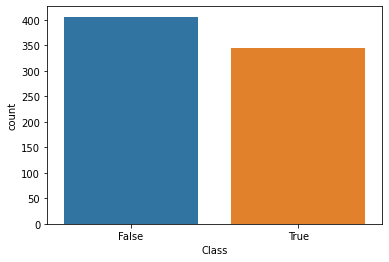

In [3]:
import seaborn as sns

sns.countplot(x= 'Class', data = df1)
plt.xticks(rotation=0)


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

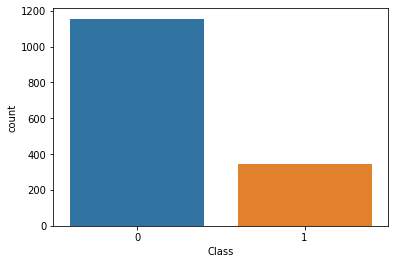

In [4]:

import seaborn as sns
sns.countplot(x= 'Class', data = df_means)
plt.xticks(rotation=0)

In [5]:
features = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15']

X_df = df1[features].copy()
y_df = df1['Class'].copy()

X = X_df.values
y = y_df.values


X_df_mean = df_means[features].copy()
y_df_mean = df_means['Class'].copy()

X_mean = X_df_mean.values
y_mean = y_df_mean.values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.20, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf_d = DecisionTreeClassifier()
clf_d.fit(X_train, y_train)
y_pred_d = clf_d.predict(X_test)
print("With drop NaN")
print(clf_d.score(X_test, y_test))

score = cross_val_score(clf_d, X_train, y_train, cv=5) 
print(score)

param_grid_d = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,15)
}
clf_d_grid = GridSearchCV(clf_d, param_grid_d, cv = 10, n_jobs=-1)
clf_d_grid.fit(X_train, y_train)
print(clf_d_grid.best_score_)
print(clf_d_grid.best_params_)


clf_d.fit(X_train_mean, y_train_mean)
y_pred_d_mean = clf_d.predict(X_test_mean)
print("With mean NaN")
print(clf_d.score(X_test_mean, y_test_mean))

score_mean = cross_val_score(clf_d, X_train_mean, y_train_mean, cv=5) 
print(score_mean)

clf_d_grid.fit(X_train_mean, y_train_mean)
print(clf_d_grid.best_score_)
print(clf_d_grid.best_params_)

With drop NaN
0.82
[0.85       0.83333333 0.8        0.825      0.83333333]
0.8683333333333334
{'criterion': 'gini', 'max_depth': 1}
With mean NaN
0.9333333333333333
[0.95833333 0.9125     0.89166667 0.90833333 0.92916667]
0.9216666666666666
{'criterion': 'gini', 'max_depth': 4}


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
print("With drop NaN")
print(gnb.score(X_test, y_test))


score = cross_val_score(gnb, X_train, y_train, cv=5) 
print(score)

param_grid_g = {
    
}
clf_g_grid = GridSearchCV(gnb, param_grid_g, cv = 10, n_jobs=-1)
clf_g_grid.fit(X_train, y_train)
print(clf_g_grid.best_score_)


y_pred_gnb_mean = gnb.fit(X_train_mean, y_train_mean).predict(X_test_mean)
print("With mean NaN")
print(gnb.score(X_test_mean, y_test_mean))


score_mean = cross_val_score(gnb, X_train_mean, y_train_mean, cv=5) 
print(score_mean)

clf_g_grid.fit(X_train_mean, y_train_mean)
print(clf_g_grid.best_score_)

With drop NaN
0.7066666666666667
[0.74166667 0.7        0.61666667 0.69166667 0.8       ]
0.7033333333333334
With mean NaN
0.7466666666666667
[0.75833333 0.72916667 0.71666667 0.72083333 0.70416667]
0.7258333333333333


In [9]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
y_pre_svc = clf_svc.predict(X_test)
print("With drop NaN")
print(clf_svc.score(X_test, y_test))

score = cross_val_score(clf_svc, X_train, y_train, cv=5) 
print(score)

param_grid_svc ={
    'C': [100, 500, 1000, 5000],
    'kernel': ['rbf', 'sigmoid']
}
clf_svc_grid = GridSearchCV(clf_svc, param_grid_svc, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
clf_svc_grid.fit(X_train, y_train)
print(clf_svc_grid.best_score_)
print(clf_svc_grid.best_params_)


clf_svc.fit(X_train_mean, y_train_mean)
y_pre_svc_mean = clf_svc.predict(X_test_mean)
print("With mean NaN")
print(clf_svc.score(X_test_mean, y_test_mean))

score_mean = cross_val_score(clf_svc, X_train_mean, y_train_mean, cv=5) 
print(score_mean)

clf_svc_grid.fit(X_train_mean, y_train_mean)
print(clf_svc_grid.best_score_)
print(clf_svc_grid.best_params_)

With drop NaN
0.6266666666666667
[0.63333333 0.61666667 0.51666667 0.58333333 0.65833333]
0.8816666666666666
{'C': 5000, 'kernel': 'rbf'}
With mean NaN
0.8
[0.82083333 0.8        0.81666667 0.80416667 0.775     ]
0.9358333333333334
{'C': 5000, 'kernel': 'rbf'}


In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pre_knn = clf_knn.predict(X_test)
print("With drop NaN")
print(clf_knn.score(X_test, y_test))


score = cross_val_score(clf_knn, X_train, y_train, cv=5) 
print(score)

param_grid_k ={
    'n_neighbors': [10, 20, 30, 40, 50, 100],
    'p': [1, 2, 3]
}
clf_k_grid = GridSearchCV(clf_knn, param_grid_k, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
clf_k_grid.fit(X_train, y_train)
print(clf_k_grid.best_score_)
print(clf_k_grid.best_params_)

clf_knn.fit(X_train_mean, y_train_mean)
y_pre_knn_mean = clf_knn.predict(X_test_mean)
print("With mean NaN")
print(clf_knn.score(X_test_mean, y_test_mean))


score_mean = cross_val_score(clf_knn, X_train_mean, y_train_mean, cv=5) 
print(score_mean)

clf_k_grid.fit(X_train_mean, y_train_mean)
print(clf_k_grid.best_score_)
print(clf_k_grid.best_params_)

With drop NaN
0.62
[0.56666667 0.7        0.6        0.61666667 0.6       ]
0.6866666666666668
{'n_neighbors': 10, 'p': 1}
With mean NaN
0.8066666666666666
[0.85       0.82083333 0.825      0.79583333 0.8125    ]
0.8491666666666667
{'n_neighbors': 20, 'p': 1}


In [11]:
df_test_p = pd.read_csv('../input/p92-data-test/CE802_P2_Test.csv')
means_p_t = df_test_p['F15'].mean()
df_test_p1 = df_test_p.where(pd.notnull(df_test_p), means_p_t)
df_test_p1['Class'] = (df_test_p1['Class'] == True).astype(int)

X_test_p = df_test_p1[features].copy()

X_test_p = X_test_p.values

In [12]:
clf_svc = SVC(C=5000)
clf_svc.fit(X_mean, y_mean)
y_pre_svc_p = clf_svc.predict(X_test_p)

new_array = pd.DataFrame({'Class': y_pre_svc_p.astype(bool)})
df_test_p1['Class'] = new_array
print(df_test_p1)                          

       F1     F2     F3     F4      F5    F6     F7    F8     F9  F10     F11  \
0       4   5.58  -4.66  31.83   69.04 -0.35  -1.29  0.06  -3.67    1 -243.75   
1      80  37.95   4.40  50.70  199.04 -4.83   5.19  7.25  -4.67   10 -474.75   
2      60   1.08  -4.14  32.13   73.04  0.14   2.01  0.59  -3.67    1 -234.75   
3     240  34.95   3.74  44.85  264.04 -2.92  11.52  8.45 -14.67   10 -174.75   
4      42   4.11  -3.78  31.92   92.04  1.09  -2.67  0.72  -3.67    1 -282.75   
...   ...    ...    ...    ...     ...   ...    ...   ...    ...  ...     ...   
1495   62   5.13  -5.32  32.46   72.04  1.17  -1.62  0.41   0.33    1 -306.75   
1496   30   0.69  -3.96  32.70   78.04 -0.16  -0.57  0.01  -1.67    1 -288.75   
1497   94   4.95  -5.38  32.19   91.04  1.99   1.47  0.56  -1.67    1 -252.75   
1498   70   3.72  -6.82  33.06   74.04  0.50   2.52  0.24   0.33    1 -351.75   
1499   52   3.09 -10.72  30.69   74.04  0.82   0.33  0.40  -1.67    0 -252.75   

       F12    F13   F14    

In [13]:
rows = df_test_p1
  
# using the savetxt  
# from the numpy module 

np.savetxt("test.csv",  
           rows, 
           delimiter =", ",
           header = "F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, Class",
           fmt ='% s',
           comments =" ")

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_mean, y_pre_svc_mean))

print(classification_report(y_test_mean, y_pre_svc_mean, target_names=['Buy expensive product', 'Buy cheap product']))

[[191  40]
 [ 20  49]]
                       precision    recall  f1-score   support

Buy expensive product       0.91      0.83      0.86       231
    Buy cheap product       0.55      0.71      0.62        69

             accuracy                           0.80       300
            macro avg       0.73      0.77      0.74       300
         weighted avg       0.82      0.80      0.81       300



Average precision-recall score: 0.97


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

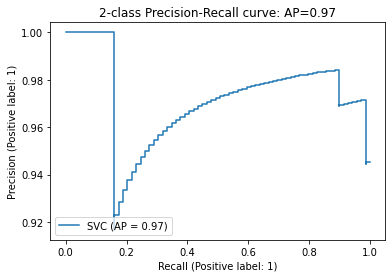

In [15]:
from sklearn.metrics import average_precision_score
y_score = clf_svc.decision_function(X_test_mean)
average_precision = average_precision_score(y_test_mean, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf_svc, X_test_mean, y_test_mean)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))